# Multi linear regression

prepare a prediction model for predicting Price.

#### Data Description

* Model -- model of the car
* Price  -- Offer Price in EUROs	
* Age_08_04 -- Age in months as in August 2004	
* Mfg_Month -- Manufacturing month (1-12)	
* Mfg_Year	-- Manufacturing Year
* KM -- Accumulated Kilometers on odometer
* Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
* HP -- Horse Power
* Met_Color	 -- Metallic Color?  (Yes=1, No=0)
* Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
* Automatic	-- Automatic ( (Yes=1, No=0)
* cc -- Cylinder Volume in cubic centimeters
* Doors -- Number of doors
* Cylinders	-- Number of cylinders
* Gears -- Number of gear positions
* Quarterly_Tax -- Quarterly road tax in EUROs
* Weight -- Weight in Kilograms
* Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
* BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
* Guarantee_Period -- 	Guarantee period in months
* ABS -- Anti-Lock Brake System (Yes=1, No=0)
* Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
* Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
* Airco -- Airconditioning  (Yes=1, No=0)
* Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
* Boardcomputer -- Boardcomputer  (Yes=1, No=0)
* CD_Player -- CD Player  (Yes=1, No=0)
* Central_Lock -- Central Lock  (Yes=1, No=0)
* Powered_Windows -- Powered Windows  (Yes=1, No=0)
* Power_Steering -- Power Steering  (Yes=1, No=0)
* Radio -- Radio  (Yes=1, No=0)
* Mistlamps	-- Mistlamps  (Yes=1, No=0)
* Sport_Model -- Sport Model  (Yes=1, No=0)
* Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
* Metallic_Rim --Metallic Rim  (Yes=1, No=0)
* Radio_cassette -- Radio Cassette  (Yes=1, No=0)
* Tow_Bar -- Tow Bar  (Yes=1, No=0)


### Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [55]:
tc = pd.read_csv('ToyotaCorolla.csv', encoding = 'ISO-8859-1')

In [56]:
tc.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0


In [57]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

### EDA

In [58]:
tc = tc.loc[:,['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']] 

In [59]:
tc.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


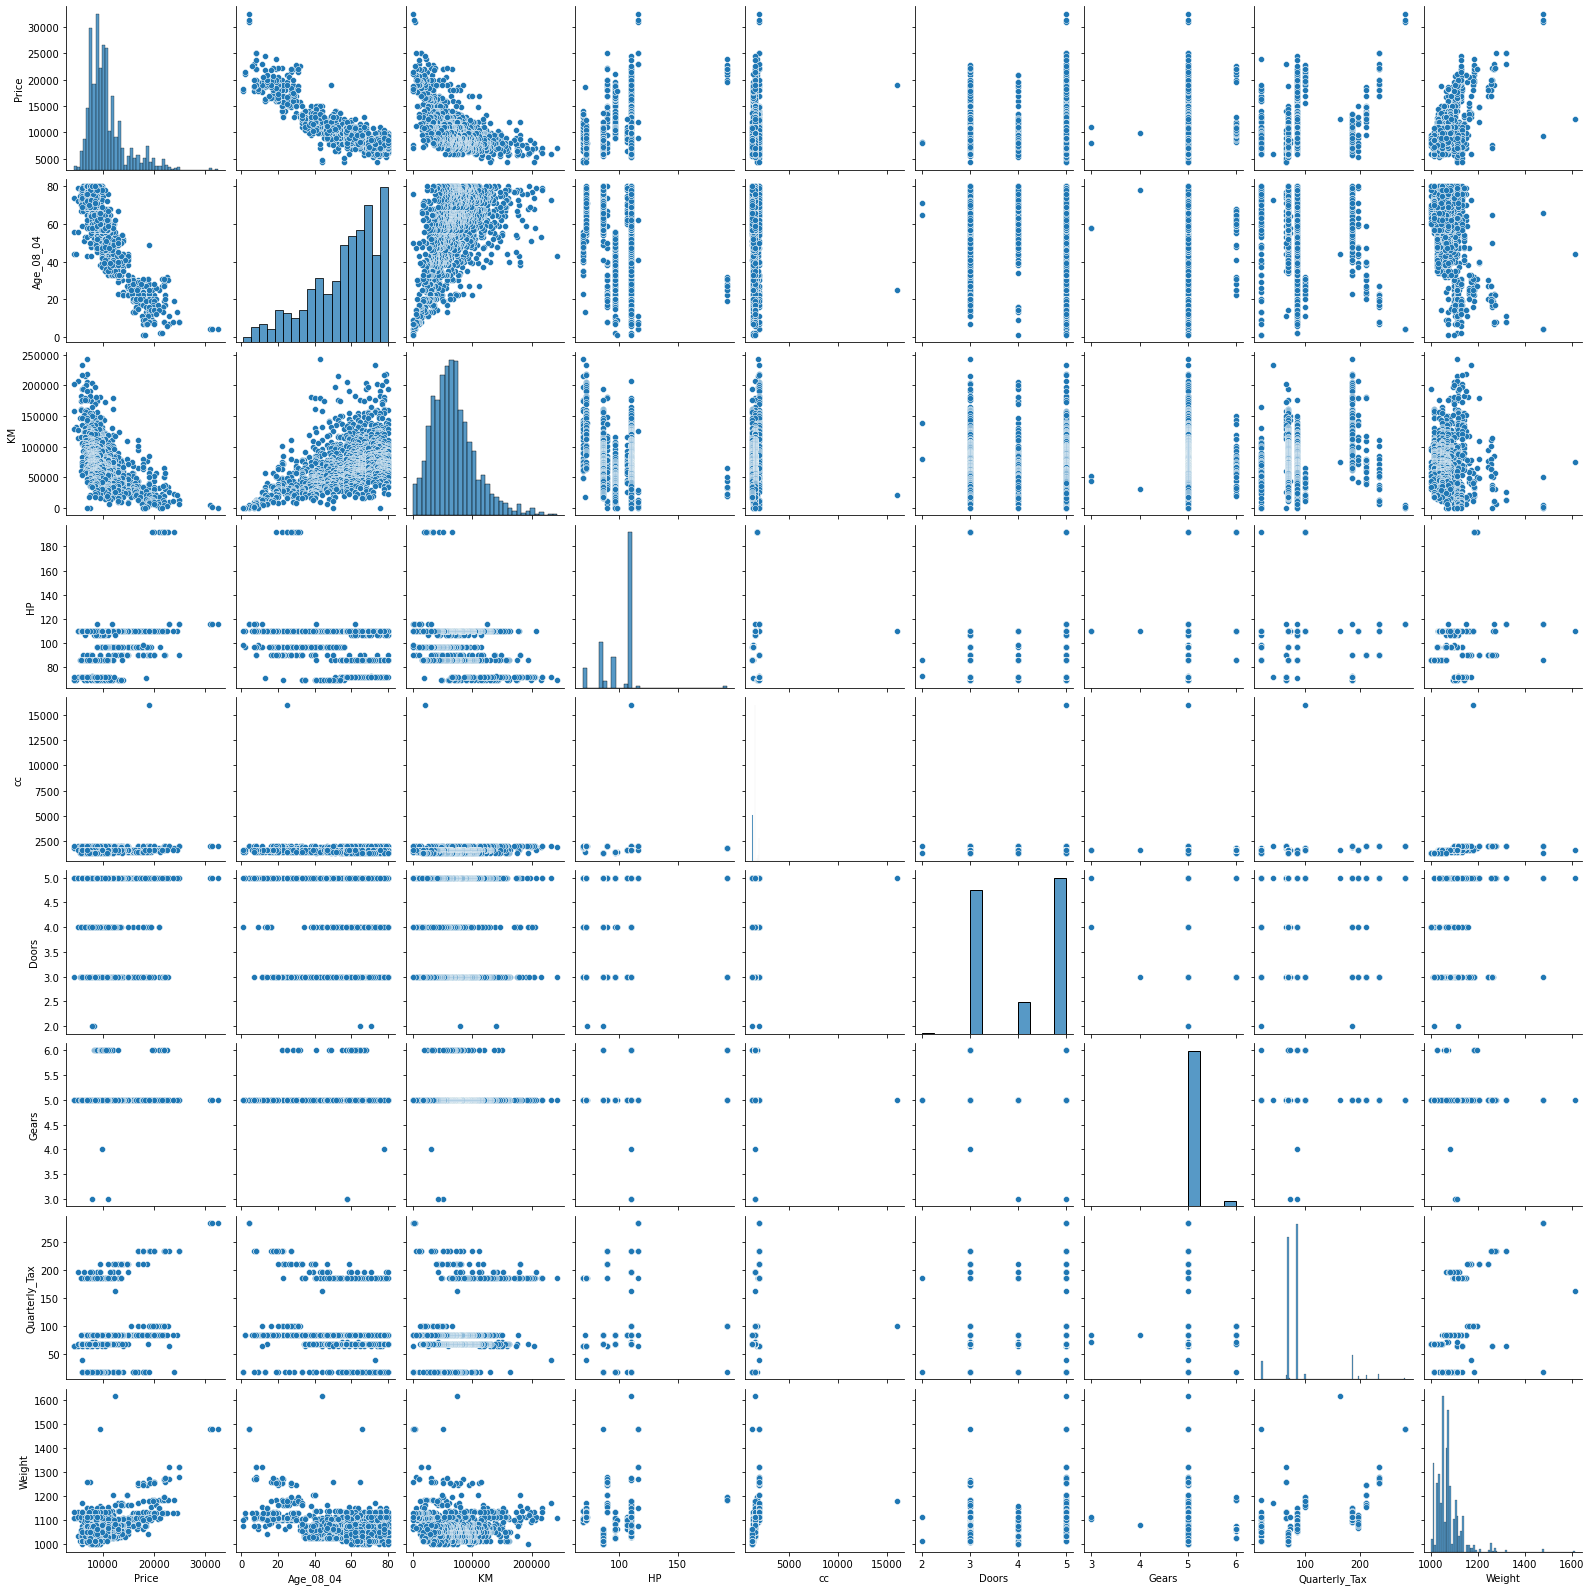

In [60]:
sns.pairplot(tc)

<AxesSubplot:>

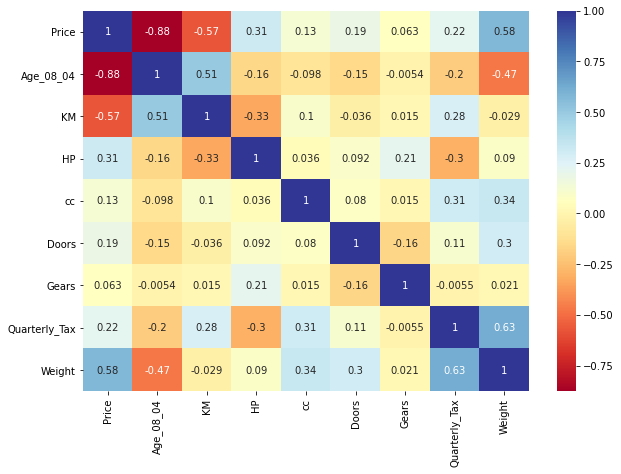

In [61]:
plt.figure(figsize=(10,7))
sns.heatmap(tc.corr(), annot=True, cmap='RdYlBu')

<AxesSubplot:xlabel='Age_08_04'>

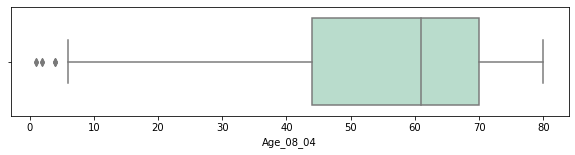

In [62]:
plt.figure(figsize=(10,2))
sns.boxplot(x=tc['Age_08_04'], palette='Pastel2')

<AxesSubplot:xlabel='Price'>

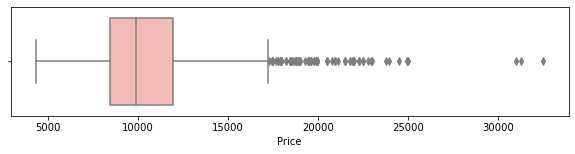

In [63]:
plt.figure(figsize=(10,2))
sns.boxplot(x=tc['Price'], palette='Pastel1')

<AxesSubplot:xlabel='Price'>

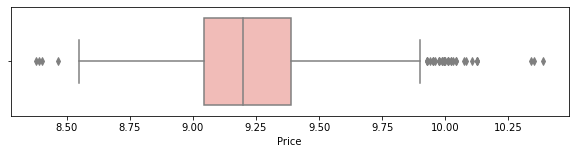

In [143]:
plt.figure(figsize=(10,2))
sns.boxplot(x=np.log(tc['Price']), palette='Pastel1')

<AxesSubplot:xlabel='Doors', ylabel='Price'>

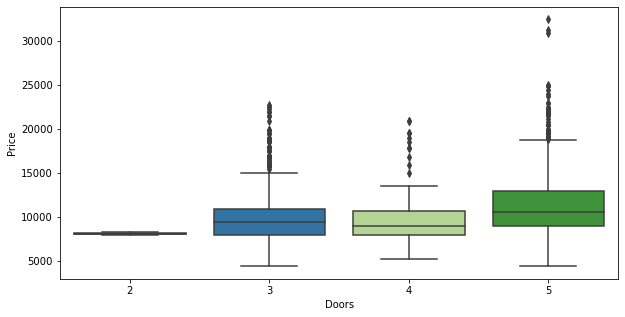

In [64]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Doors', y='Price', data=tc, palette='Paired')

<AxesSubplot:xlabel='Gears', ylabel='Price'>

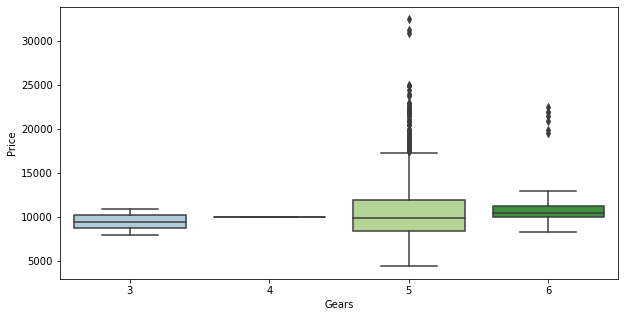

In [65]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Gears', y='Price', data=tc, palette='Paired')

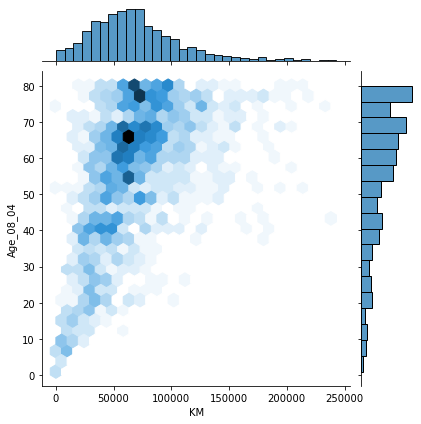

In [66]:
sns.jointplot(x='KM', y ='Age_08_04', data=tc ,kind='hex')

<AxesSubplot:>

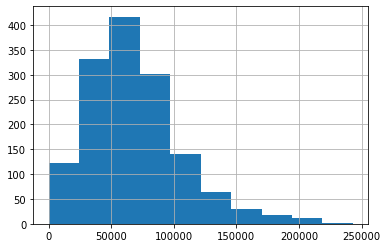

In [67]:
tc['KM'].hist()

### Train Test Split

In [68]:
X = tc.drop('Price', axis=1)
y = tc['Price']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Normalization

In [70]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Multilinear Regression

In [71]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [72]:
model.score(X_train, y_train)

0.8636809961985239

### Prediction and Evaluation

In [73]:
predicted = model.predict(X_test)

<AxesSubplot:xlabel='Price'>

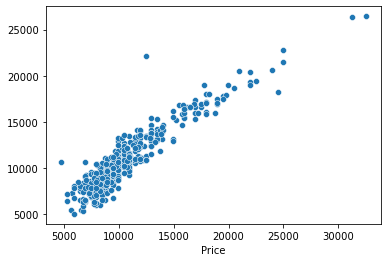

In [117]:
sns.scatterplot(x=y_test, y=predicted)

In [75]:
mean_squared_error = np.mean((predicted - y_test)**2) 
mean_squared_error

1912084.7234836908

In [76]:
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = X.columns 
lreg_coefficient['Coefficient'] = pd.Series(model.coef_)

In [77]:
lreg_coefficient

,Columns,Coefficient
0,Age_08_04,-9523.862107
1,KM,-4922.632703
2,HP,3622.369490
3,cc,-1095.642718
4,Doors,58.036652
5,Gears,1729.245224
6,Quarterly_Tax,586.514895
7,Weight,8479.957832


<AxesSubplot:xlabel='Coefficient', ylabel='Columns'>

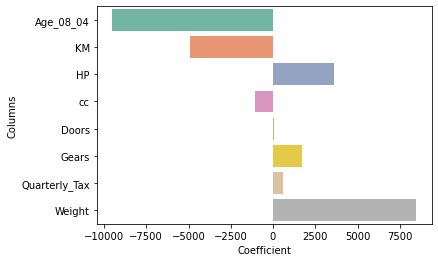

In [78]:
sns.barplot(x='Coefficient', y='Columns', data=lreg_coefficient, palette='Set2')

### Lasso Regression

In [103]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 0.3) 
lasso.fit(X_train, y_train) 
y_pred1 = lasso.predict(X_test)

lreg_coefficient['Lasso Coefficient'] = pd.Series(lasso.coef_)
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
mean_squared_error

1914231.634662122

<AxesSubplot:xlabel='Lasso Coefficient', ylabel='Columns'>

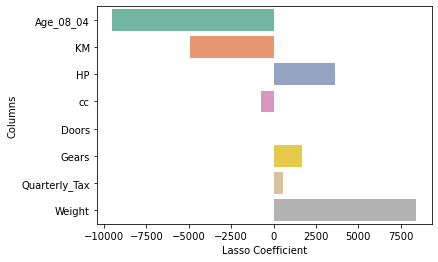

In [104]:
sns.barplot(x='Lasso Coefficient', y='Columns', data=lreg_coefficient, palette='Set2')

### Ridge Regression

In [111]:
from sklearn.linear_model import Ridge 

# Train the model 
ridge = Ridge(alpha = 0.1) 
ridge.fit(X_train, y_train) 
y_pred2 = ridge.predict(X_test)

lreg_coefficient['Ridge Coefficient'] = pd.Series(ridge.coef_)
mean_squared_error = np.mean((y_pred2 - y_test)**2) 
mean_squared_error

1912473.3525936133

<AxesSubplot:xlabel='Ridge Coefficient', ylabel='Columns'>

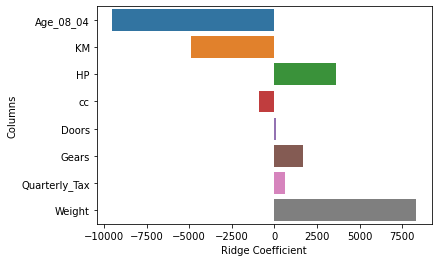

In [112]:
sns.barplot(x='Ridge Coefficient', y='Columns', data=lreg_coefficient)

##### Feature selection using L1 and L2 regularization 

In [144]:
selected_features = X.drop(['Gears','Doors','cc'],axis=1)
y = np.log(tc['Price'])

X_train1, X_test1, y_train1, y_test1= train_test_split(selected_features, y, test_size=0.3, random_state=42)

X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [145]:
model1 = LinearRegression()

model1.fit(X_train1, y_train1)

LinearRegression()

In [154]:
mean_squared_error = np.mean((np.exp(predicted1) - np.exp(y_test1))**2)
mean_squared_error

1323900.923133254

In [147]:
predicted1 = model1.predict(X_test1)

<AxesSubplot:xlabel='Price'>

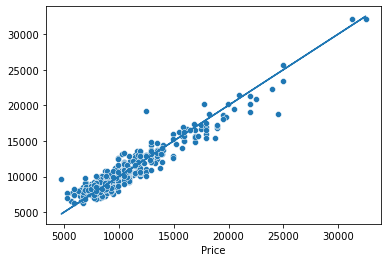

In [150]:
plt.plot(np.exp(y_test1),np.exp(y_test1))
sns.scatterplot(x = np.exp(y_test1), y=np.exp(predicted1))

Thank you!